# Exploring the effects of changing the g parameters

## Setup

Importage

In [ ]:
import os
os.system('rm -rf kcnischool2022-projectweek')
os.system('git clone https://github.com/griffithslab/kcnischool2022-projectweek')
os.chdir('kcnischool2022-projectweek/data')
os.system('python download_ds000201_data.py')
os.chdir('../')
os.system('pip install nilearn hcp_utils')

0

In [ ]:
import os,sys,glob,numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import nibabel as nib

#import hcp_utils as hcp

In [ ]:
!pwd

/content/kcnischool2022-projectweek


In [ ]:
from kspw.utils import load_stockholm_data
from kspw.pytorrww import Model_fitting,h_tf,RNNWWD,plot_fit_parameters,plot_sim_states_outputs,run_forward_model_newParas

Define some variables

In [ ]:
data_dir ='data/'

Load the data

In [ ]:
stuff = load_stockholm_data()
schaf_idxs,schaf_labs,schaf_rgbs,schaf_dat,subs,dwiconn_dfs,ptsrs_dfs,pcrs_dfs = stuff
subsesses = list(pcrs_dfs.keys())

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Load default parameter values

In [ ]:
par_opt=np.loadtxt(data_dir +'para_optimal.txt')#[F.model.g.detach().numpy()[0], F.model.g_EE.detach().numpy()[0], F.model.g_IE.detach().numpy(), F.model.g_EI.detach().numpy(), \
         #F.model.std_in.detach().numpy(),F.model.std_out.detach().numpy()]
gain_opt = np.loadtxt(data_dir +'gain_optimal.txt')#F.model.w_bb.detach().numpy()
g_opt = par_opt[0]
g_EE_opt = par_opt[1]
g_IE_opt = par_opt[2]
g_EI_opt = par_opt[3]
std_in_opt = par_opt[4]
std_out_opt = par_opt[5]


Here we will mostly base our explorations off of one subject's SC and FC data.

First, grab that subject's data:

In [ ]:
sub = subs[1]
sc = dwiconn_dfs[sub].values.copy()
sc =0.5*(sc+sc.T)
sc = np.log1p(sc)/np.linalg.norm(np.log1p(sc))
ts = ptsrs_dfs[sub,2].values.copy()
fc_emp = np.corrcoef(ts.T)
sub

9003

Next, initialize the model that we will then be varying

In [ ]:
%%time
model = RNNWWD(input_size=2, node_size=100, batch_size=19,#3,#9,
               step_size=0.05, tr=2.5, sc=sc, fit_gains=True,
               g_mean_ini=80, g_std_ini = .1, gEE_mean_ini=2.5, gEE_std_ini = .1)

CPU times: user 0 ns, sys: 2.01 ms, total: 2.01 ms
Wall time: 1.18 ms


In [ ]:
%%time
F = Model_fitting(model, ts, num_epochs=1)

CPU times: user 32 µs, sys: 1e+03 ns, total: 33 µs
Wall time: 20.7 µs


## Default run

First, run the model with the default parameter values

In [ ]:
%%time
res = run_forward_model_newParas(F, g= g_opt, g_EE=g_EE_opt, g_IE=g_IE_opt, 
                                         g_EI=g_EI_opt, std_in= std_in_opt, 
                                         std_out=std_out_opt, w_bb=gain_opt)

0.6346680793676184
CPU times: user 20.3 s, sys: 2.98 s, total: 23.3 s
Wall time: 22.2 s


In [ ]:
res.keys()

dict_keys(['simBOLD', 'E', 'I', 'x', 'f', 'v', 'q'])

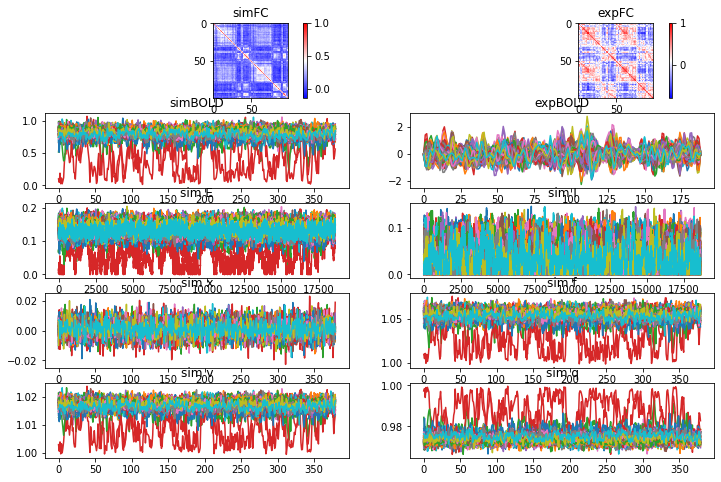

In [ ]:
plot_sim_states_outputs(ts, res)

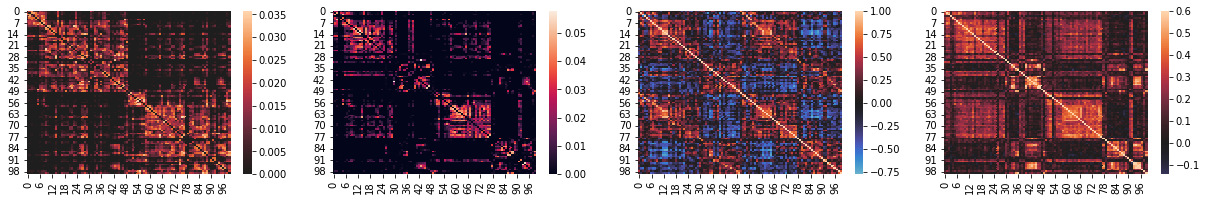

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(21,3))

a = ax[0]
sns.heatmap(sc,center=0,ax=a)

a = ax[1]
sns.heatmap(F.model.sc_m.detach(),ax=a)

a = ax[2]
sns.heatmap(np.corrcoef(ts.T),center=0,ax=a)

a = ax[3]
sns.heatmap(np.corrcoef(res['simBOLD']),center=0,ax=a,vmax=0.6)



## Vary Gei

0.6293939294156832
0.6370548143006155
0.6197006875250863
0.630284447556396
0.6111668285369769
0.5965813535664399
0.6385284151948207
0.6124500819762866
0.6326451248414106
0.6175851188844115
0.6244694695557875
0.6136677302455996
0.5974335068623001
0.6154211045564529
0.6089767925746616
0.580035359669588
0.547305384471826
0.5769149763607594
0.6382045178696696
0.6048719509046816
0.6005838684875953
0.6006567499182198
0.563611616054169
0.5720355296688112
0.5929742243527775
0.5807391334677475
0.5703206766844179
0.5486998108948014
0.6097151897502919
0.6232233329125744
0.5625311935876961
0.6252223664663119
0.5987348150800635
0.5912946210625761
0.5741214044402604
0.6356076341030414
0.5912955009157776
0.5469715654590078
0.609079785014339
0.5821670057946285
0.5500648455352517
0.5978352067069859
0.5923980971900042
0.524916355861626
0.5908544041925892
0.5546255311864007
0.5927240589203698
0.563065462437421
0.5442034775940605
0.5631351589673488
0.5422194470049423
0.5410305677964914
0.5238843716956553


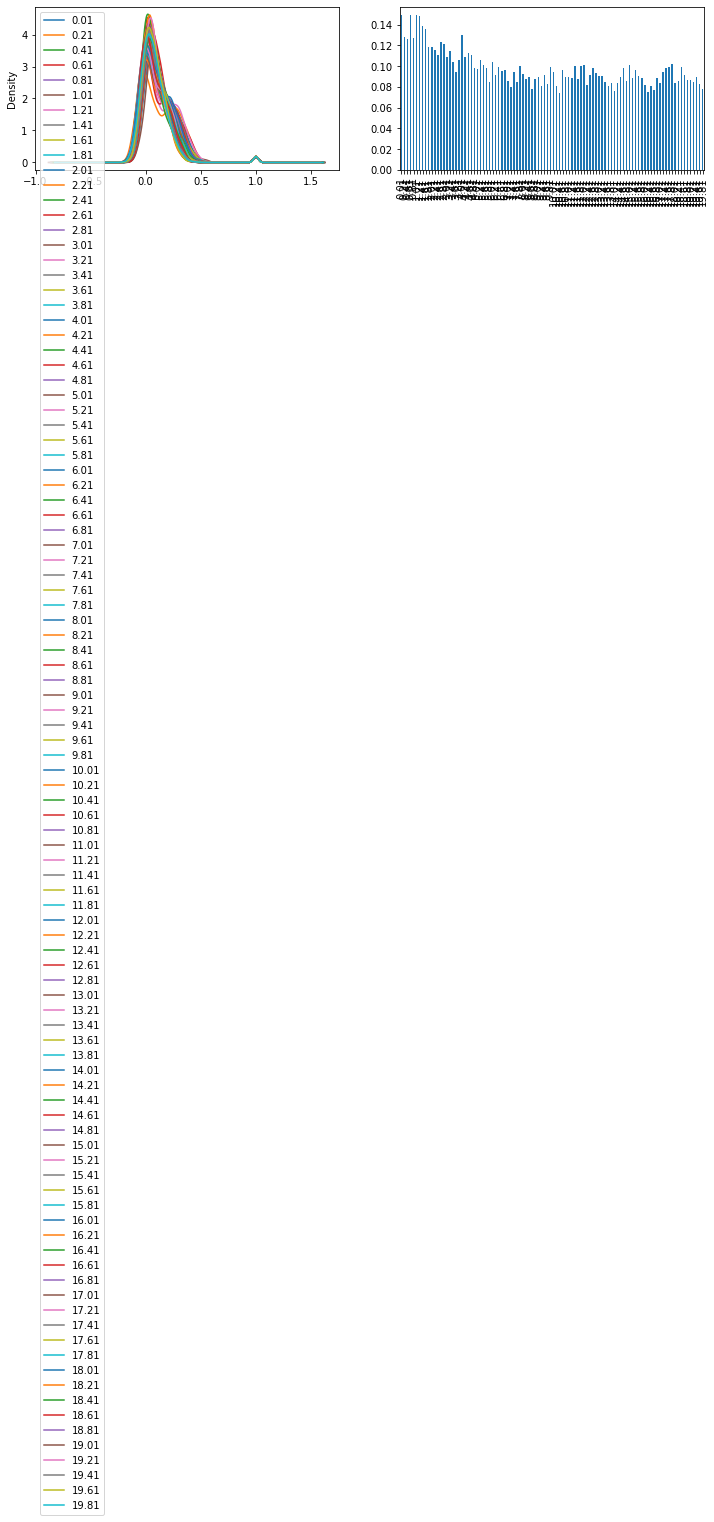

In [ ]:
%%time

g_EIs = np.arange(0.01,20.0,0.2)
g_EIs

all_res_vgEI,all_simfcs_vgEI,all_simfcs_vgEI_rav = {},{},{}
for g_EI in g_EIs:
    res = run_forward_model_newParas(F, g= g_opt, g_EE=g_EE_opt, g_IE=g_IE_opt, 
                                         g_EI=g_EI, 
                                     std_in= std_in_opt, 
                                         std_out=std_out_opt, w_bb=gain_opt)
    all_res_vgEI[g_EI] = res
    
    simfc = np.corrcoef(all_res_vgEI[g_EI]['simBOLD'])
    all_simfcs_vgEI[g_EI] = simfc
    all_simfcs_vgEI_rav[g_EI] = simfc.ravel()
    
df_all_simfcs_vgEI_rav = pd.DataFrame(all_simfcs_vgEI_rav)
newcols  = ['%1.2f' %c for c in df_all_simfcs_vgEI_rav.columns]
df_all_simfcs_vgEI_rav.columns = newcols


fig, ax = plt.subplots(ncols=2, figsize=(12,3))

df_all_simfcs_vgEI_rav.plot(kind='kde',ax=ax[0])
df_all_simfcs_vgEI_rav.mean().plot(kind='bar',ax=ax[1])

## Vary Gie

0.635170985095269
0.6542621992163257
0.6356005507717197
0.6174258008570285
0.6262550713956199
0.6550595862068417
0.6469580084720967
CPU times: user 2min 27s, sys: 8.15 s, total: 2min 35s
Wall time: 2min 27s


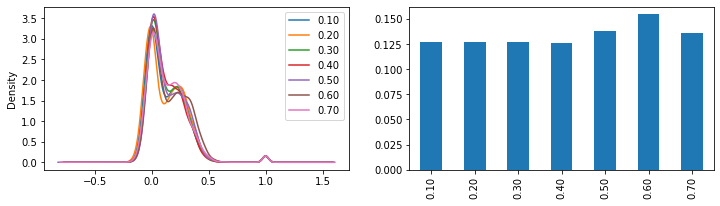

In [ ]:
%%time

g_IEs = np.arange(0.1,0.8,0.1)
g_IEs

all_res_vgIE,all_simfcs_vgIE,all_simfcs_vgIE_rav = {},{},{}
for g_IE in g_IEs:
    res = run_forward_model_newParas(F, g= g_opt, g_EE=g_EE_opt, g_EI=g_EI_opt, 
                                         g_IE=g_IE, 
                                     std_in= std_in_opt, 
                                         std_out=std_out_opt, w_bb=gain_opt)
    all_res_vgIE[g_IE] = res
    
    simfc = np.corrcoef(all_res_vgIE[g_IE]['simBOLD'])
    all_simfcs_vgIE[g_IE] = simfc
    all_simfcs_vgIE_rav[g_IE] = simfc.ravel()
    
df_all_simfcs_vgIE_rav = pd.DataFrame(all_simfcs_vgIE_rav)
newcols  = ['%1.2f' %c for c in df_all_simfcs_vgIE_rav.columns]
df_all_simfcs_vgIE_rav.columns = newcols


fig, ax = plt.subplots(ncols=2, figsize=(12,3))

df_all_simfcs_vgIE_rav.plot(kind='kde',ax=ax[0])
df_all_simfcs_vgIE_rav.mean().plot(kind='bar',ax=ax[1])

2D Param Sweep: Gie and Gei

In [ ]:
import itertools

In [ ]:
%%time

g_IEs = np.arange(0.46,10,1)
g_EIs = np.arange(0.46,10,1)

all_res,all_simfcs,all_simfcs_rav = {},{},{}
for g_IE in g_IEs:
  all_res[g_IE] = []
  all_simfcs[g_IE] = []
  all_simfcs_rav[g_IE] = []
  for g_EI in g_EIs:
    res = run_forward_model_newParas(F, g= g_opt, g_EE=g_EE_opt, g_IE=g_IE, 
                                         g_EI=g_EI, std_in= std_in_opt, 
                                         std_out=std_out_opt, w_bb=gain_opt)
    all_res[g_IE].append(res)
    simfc = (np.corrcoef(all_res[g_IE][-1]['simBOLD']))
    all_simfcs[g_IE].append(simfc)
    all_simfcs_rav[g_IE].append(simfc.ravel())

0.6214781646839036
0.6139922703483965
0.6238798200430768
0.600802503325991
0.5974316896747961
0.5667658137098285
0.5383619157239663
0.5681057846859341
0.5409034493261471
0.5474257685069998
0.6254917776968895
0.5824092254472854
0.5267249428489006
0.521438798046012
0.451773110276208
0.4844623468675548
0.4319179615267288
0.4499397321287292
0.40675909710215863
0.3296344730508518
0.5870884071129042
0.5320994779853101
0.45641883633198493
0.46721705864461605
0.37468474370931215
0.3057993717547943
0.2985907127579081
0.3294407533358772
0.27919487336380333
0.27751080222094743
0.5868962349954432
0.5743223311677264
0.47055438799475485
0.369041725113839
0.31211836141590227
0.33335979281895034
0.20605231616168465
0.2085837658845351
0.21155959724689974
0.2018716496535046
0.5810903286056401
0.5396658195386724
0.40771763028804364
0.36176318847134703
0.2829883566299017
0.26619872561518937
0.19510473875302942
0.15922549889683488
0.14430367466308178
0.16321126674078798
0.5645073310026567
0.478371974171018

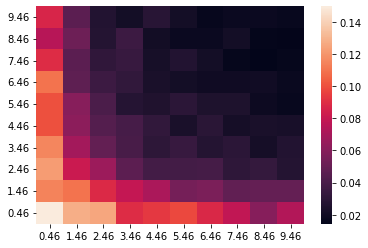

In [ ]:
# Heatmap of average correlation within simulated FC matrix for different values of Gei and Gie
df_heatmap = pd.DataFrame(all_simfcs_rav, index=g_EIs)
df_heatmap = df_heatmap.applymap(np.mean).iloc[::-1]
sns.heatmap(df_heatmap)

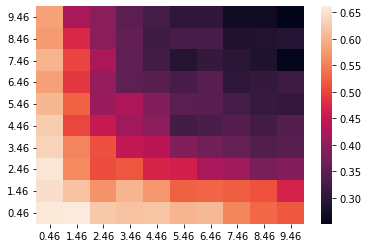

In [ ]:
# Heatmap of correlation between simulated FC and empirical FC for different values of Gei and Gie
df_cor = pd.DataFrame(all_simfcs_rav, index=g_EIs)

for row_index in range(df_cor.shape[0]):
  for column_index in range(df_cor.shape[1]):
    df_cor.iloc[row_index, column_index] = np.corrcoef( df_cor.iloc[row_index, column_index], fc_emp.ravel())[0,1]
sns.heatmap(df_cor.applymap(float).iloc[::-1])

## 2D param sweep: Gie and Gee


In [ ]:
%%time

g_IE_values = np.arange(0.46,10,1)
g_EE_values = np.arange(1,10,0.9)

all_res,all_simfcs,all_simfcs_rav = {},{},{}
for g_IE in g_IE_values:
  all_res[g_IE] = []
  all_simfcs[g_IE] = []
  all_simfcs_rav[g_IE] = []
  for g_EE in g_EE_values:
    res = run_forward_model_newParas(F, g= g_opt, g_EE=g_EE, g_IE=g_IE, 
                                         g_EI=g_EI_opt, std_in= std_in_opt, 
                                         std_out=std_out_opt, w_bb=gain_opt)
    all_res[g_IE].append(res)
    simfc = (np.corrcoef(all_res[g_IE][-1]['simBOLD']))
    all_simfcs[g_IE].append(simfc)
    all_simfcs_rav[g_IE].append(simfc.ravel())

In [ ]:
# Heatmap of average correlation within simulated FC matrix for different values of Gee and Gie
df_heatmap = pd.DataFrame(all_simfcs_rav, index=g_EE_values)
df_heatmap = df_heatmap.applymap(np.mean).iloc[::-1]
sns.heatmap(df_heatmap)

In [ ]:
# Heatmap of correlation between simulated FC and empirical FC for different values of Gee and Gie
df_cor = pd.DataFrame(all_simfcs_rav, index=g_EE_values)

for row_index in range(df_cor.shape[0]):
  for column_index in range(df_cor.shape[1]):
    df_cor.iloc[row_index, column_index] = np.corrcoef( df_cor.iloc[row_index, column_index], fc_emp.ravel())[0,1]
sns.heatmap(df_cor.applymap(float).iloc[::-1])